# 실습 1
훈련을 진행하고 Output을 지우지 말고 제출할 것!

In [1]:
import tensorflow as tf
from sklearn import model_selection
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Add, Flatten

## Problem 1: CIFAR10 데이터셋을 이용하여 MLP 모델 만들고 훈련시키기
다른 데이터셋을 이용하여 스스로 MLP를 구성하고 훈련해 보자. <br>
10개의 서로 다른 class를 가진 CIFAR10 데이터셋을 이용하여 비슷하게 MLP 모델을 만들고 훈련하여 제출하시오. <br>
모델은 최소한 3개 이상의 Dense layer를 사용하여 구성하여야 하고 0.4 이상의 Validation accuracy를 달성할 때까지 훈련을 진행하시오. 또한 Regularizer를 한번 이상 활용하시오.(Dropout 제외) <br>
*주의*: Fashion MNIST와 CIFAR10은 Input의 shape가 다르므로 이를 잘 고려해야 한다.

In [2]:
cifar10 = tf.keras.datasets.cifar10

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2)

#Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

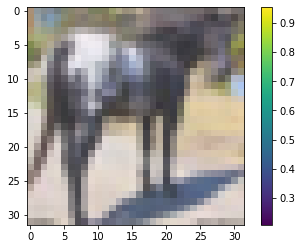

In [3]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

---
여기부터 수강생의 코드를 추가하시오

In [4]:
# to check input shape
x_train[0].shape

(32, 32, 3)

In [12]:
##################
# Regularization 제외하고 작성했습니다!

# 1. Model Construction
myModel = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3))])

nlayer_list = [256, 256]

for i in range(2):
    myModel.add(tf.keras.layers.Dense(nlayer_list[i],
                                      activation='relu'))
    myModel.add(tf.keras.layers.Dropout(0.3))
    
myModel.add(tf.keras.layers.Dense(10, activation='softmax'))

# 2. Loss & Optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(lr=0.1)

# 3. Compile
myModel.compile(optimizer = optimizer,
             loss = loss,
             metrics = ['accuracy'])

print(myModel.summary())

# 4. Training Part
hist = myModel.fit(x_train, y_train, epochs=20, validation_data = (x_valid, y_valid))
################### 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
________________________________________________

## Problem 2: 간단한 ResNet 구현

다음은 MLP layer만을 간단하게 구현한 ResNet-11 모델의 구조이다. 

`ResBlock`함수를 작성한 다음 `ResNet11`함수를 이용하여 ResNet-11를 구현해보자.
- 조건1: 1번째 ResBlock의 node는 100개, 2,3번째 ResBlock의 node는 200개를 사용한다.
- 조건2: 마지막 Layer의 node 수는 10개이다.
- 조건3: Activation은 모두 ReLU를 사용한다. 단, 마지막 layer에서는 Softmax activation을 사용한다. 
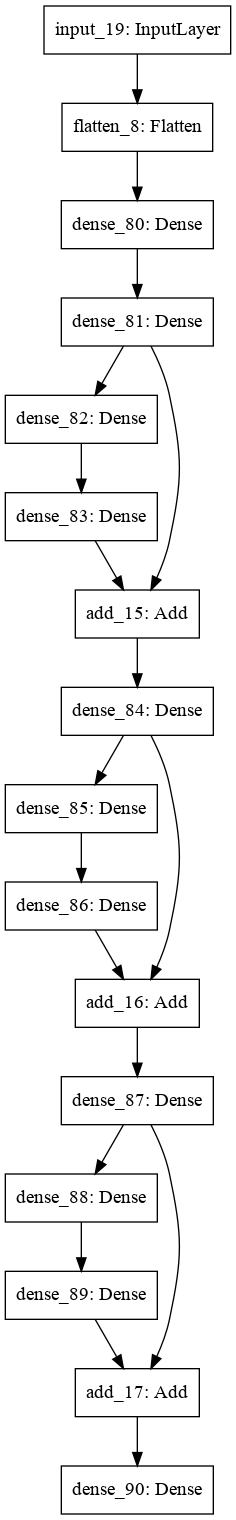


ResNet에 대해서는 다음 문서 참조:(https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf) 

In [34]:
def ResBlock(x, nodes):
    ##################
    # Your code here
    ##################    
    x_1 = Dense(nodes, activation='relu')(x)
    x_2 = Dense(nodes, activation='relu')(x_1)
    x_3 = Dense(nodes, activation='relu')(x_2)
    x = Add()([x_1, x_3])
    ##################
    
    return x    

In [35]:
def ResNet11():
    inputs = Input(shape=(224, 224, 3))    
    x = Flatten()(inputs)
    x = Dense(100)(x)
    ##################
    # Your code here
    ##################
    node_list = [100, 200, 200]
    for i in range(3):
        x = ResBlock(x, node_list[i])
    
    outputs = Dense(10, activation='softmax')(x)
    ##################
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [36]:
resnet11 = ResNet11()

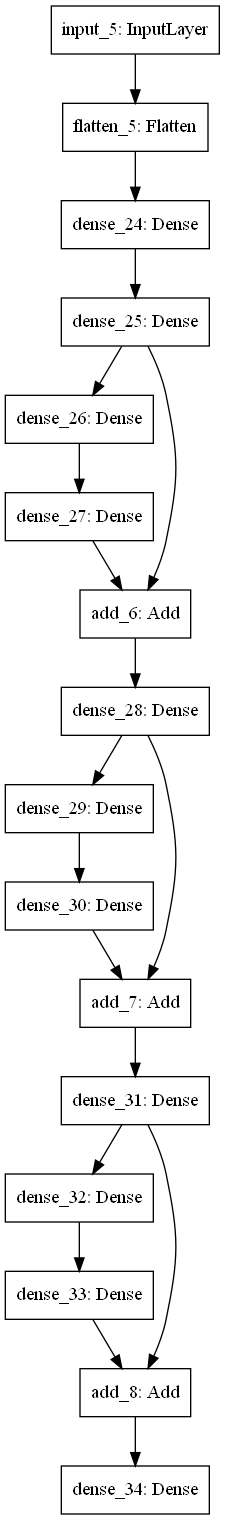

In [37]:
tf.keras.utils.plot_model(resnet11, to_file='resnet11.png')